In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("E:\Projects\Fraud Detection in Credit Card Transactions\creditcard.csv")  # Ensure the dataset is in the same directory

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\asus\AppData\Local\Temp\ipykernel_12884\2235020861.py:2: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("E:\Projects\Fraud Detection in Credit Card Transactions\creditcard.csv")  # Ensure the dataset is in the same directory


In [3]:
# Display first few rows
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Check column names to avoid KeyErrors
print("\nAvailable Columns:", df.columns.tolist())

# Verify if 'Gender' column exists before using it
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].astype('category').cat.codes
else:
    print("\n⚠️ Warning: 'Gender' column not found in the dataset. Skipping this step.")


Available Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

⚠️ Warning: 'Gender' column not found in the dataset. Skipping this step.


In [5]:
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


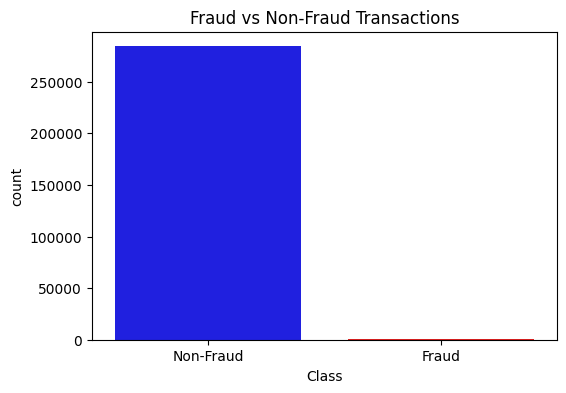

In [6]:

# --- Fraud vs Non-Fraud Transactions ---
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=df, hue="Class", legend=False, palette={0: "blue", 1: "red"})
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.show()

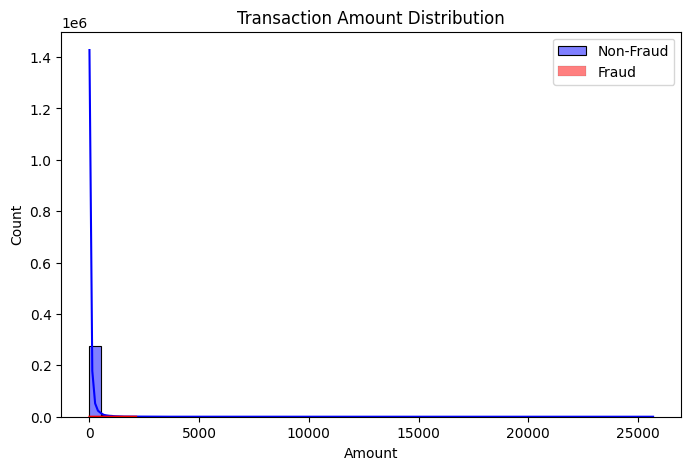

In [7]:

# --- Transaction Amount Distribution (Fraud vs Non-Fraud) ---
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Class"] == 0]["Amount"], bins=50, color="blue", label="Non-Fraud", kde=True)
sns.histplot(df[df["Class"] == 1]["Amount"], bins=50, color="red", label="Fraud", kde=True)
plt.legend()
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.show()

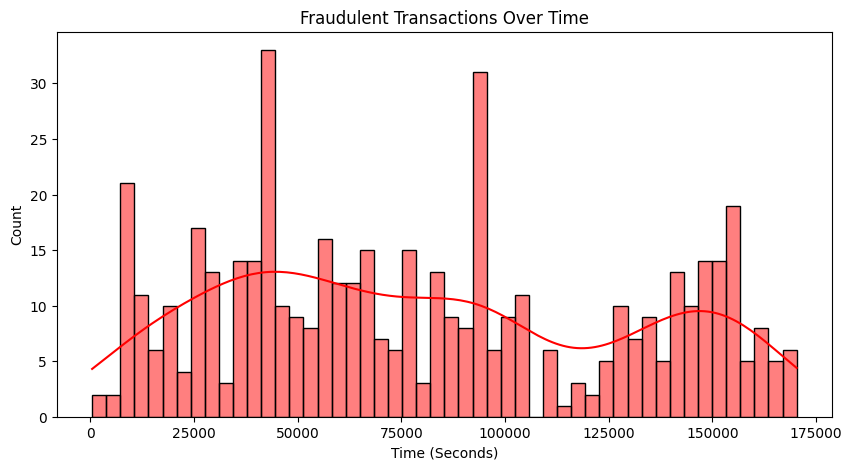

In [8]:
# --- Fraudulent Transactions Over Time ---
plt.figure(figsize=(10, 5))
sns.histplot(df[df["Class"] == 1]["Time"], bins=50, color="red", kde=True)
plt.title("Fraudulent Transactions Over Time")
plt.xlabel("Time (Seconds)")
plt.show()

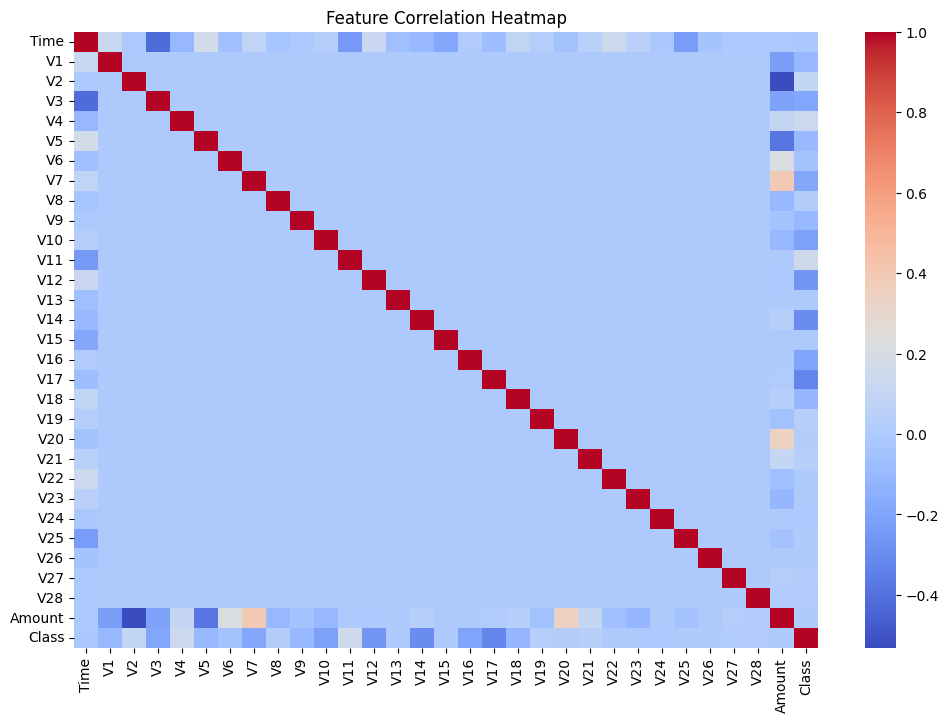

In [12]:
# --- Correlation Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
# --- Fraud Percentage ---
fraud_percentage = df["Class"].value_counts(normalize=True) * 100
print(f"\nFraudulent Transactions: {fraud_percentage[1]:.4f}% of total transactions.")


Fraudulent Transactions: 0.1727% of total transactions.
